# DATA CLEANING PROJECT : FIFA 21

## Import Module

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import re

from datetime import datetime

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline

In [2]:
# set to max
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Read Data

In [3]:
df = pd.read_csv("fifa21 raw data v2.csv")

/var/folders/2v/3x8wpnt175z2g7523fqrddz80000gn/T/ipykernel_20347/1369213445.py:1: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("fifa21 raw data v2.csv")


## Data Reading

In [4]:
df.head()

ID               Name                      LongName  \
0  158023           L. Messi                  Lionel Messi   
1   20801  Cristiano Ronaldo  C. Ronaldo dos Santos Aveiro   
2  200389           J. Oblak                     Jan Oblak   
3  192985       K. De Bruyne               Kevin De Bruyne   
4  190871          Neymar Jr    Neymar da Silva Santos Jr.   

                                           photoUrl  \
0  https://cdn.sofifa.com/players/158/023/21_60.png   
1  https://cdn.sofifa.com/players/020/801/21_60.png   
2  https://cdn.sofifa.com/players/200/389/21_60.png   
3  https://cdn.sofifa.com/players/192/985/21_60.png   
4  https://cdn.sofifa.com/players/190/871/21_60.png   

                                           playerUrl Nationality  Age  ↓OVA  \
0  http://sofifa.com/player/158023/lionel-messi/2...   Argentina   33    93   
1  http://sofifa.com/player/20801/c-ronaldo-dos-s...    Portugal   35    92   
2  http://sofifa.com/player/200389/jan-oblak/210006/    Slovenia   27    91   
3  http://sofifa.com/player/192985/kevin-de-bruyn...     Belgium   29    91   
4  http://sofifa.com/player/190871/neymar-da-silv...      Brazil   28    91   

   POT                         Club     Contract   Positions Height Weight  \
0   93         \n\n\n\nFC Barcelona  2004 ~ 2021  RW, ST, CF  170cm   72kg   
1   92             \n\n\n\nJuventus  2018 ~ 2022      ST, LW  187cm   83kg   
2   93      \n\n\n\nAtlético Madrid  2014 ~ 2023          GK  188cm   87kg   
3   91      \n\n\n\nManchester City  2015 ~ 2023     CAM, CM  181cm   70kg   
4   91  \n\n\n\nParis Saint-Germain  2017 ~ 2022     LW, CAM  175cm   68kg   

  Preferred Foot  BOV Best Position        Joined Loan Date End    Value  \
0           Left   93            RW   Jul 1, 2004           NaN  €103.5M   
1          Right   92            ST  Jul 10, 2018           NaN     €63M   
2          Right   91            GK  Jul 16, 2014           NaN    €120M   
3          Right   91           CAM  Aug 30, 2015           NaN    €129M   
4          Right   91            LW   Aug 3, 2017           NaN    €132M   

    Wage Release Clause  Attacking  Crossing  Finishing  Heading Accuracy  \
0  €560K        €138.4M        429        85         95                70   
1  €220K         €75.9M        437        84         95                90   
2  €125K        €159.4M         95        13         11                15   
3  €370K          €161M        407        94         82                55   
4  €270K        €166.5M        408        85         87                62   

   Short Passing  Volleys  Skill  Dribbling  Curve  FK Accuracy  Long Passing  \
0             91       88    470         96     93           94            91   
1             82       86    414         88     81           76            77   
2             43       13    109         12     13           14            40   
3             94       82    441         88     85           83            93   
4             87       87    448         95     88           89            81   

   Ball Control  Movement  Acceleration  Sprint Speed  Agility  Reactions  \
0            96       451            91            80       91         94   
1            92       431            87            91       87         95   
2            30       307            43            60       67         88   
3            92       398            77            76       78         91   
4            95       453            94            89       96         91   

   Balance  Power  Shot Power  Jumping  Stamina  Strength  Long Shots  \
0       95    389          86       68       72        69          94   
1       71    444          94       95       84        78          93   
2       49    268          59       78       41        78          12   
3       76    408          91       63       89        74          91   
4       83    357          80       62       81        50          84   

   Mentality  Aggression  Interceptions  Positioni

In [5]:
df.tail()

ID          Name        LongName  \
18974  247223        Xia Ao          Ao Xia   
18975  258760      B. Hough       Ben Hough   
18976  252757   R. McKinley  Ronan McKinley   
18977  243790  Wang Zhen'ao    Zhen'ao Wang   
18978  252520     Zhou Xiao       Xiao Zhou   

                                               photoUrl  \
18974  https://cdn.sofifa.com/players/247/223/21_60.png   
18975  https://cdn.sofifa.com/players/258/760/21_60.png   
18976  https://cdn.sofifa.com/players/252/757/21_60.png   
18977  https://cdn.sofifa.com/players/243/790/21_60.png   
18978  https://cdn.sofifa.com/players/252/520/21_60.png   

                                               playerUrl Nationality  Age  \
18974     http://sofifa.com/player/247223/ao-xia/210006/    China PR   21   
18975  http://sofifa.com/player/258760/ben-hough/210006/     England   17   
18976  http://sofifa.com/player/252757/ronan-mckinley...     England   18   
18977  http://sofifa.com/player/243790/zhenao-wang/21...    China PR   20   
18978  http://sofifa.com/player/252520/xiao-zhou/210006/    China PR   21   

       ↓OVA  POT                      Club     Contract Positions Height  \
18974    47   55        \n\n\n\nWuhan Zall  2018 ~ 2022        CB  178cm   
18975    47   67   \n\n\n\nOldham Athletic  2020 ~ 2021        CM  175cm   
18976    47   65        \n\n\n\nDerry City  2019 ~ 2020        CM  179cm   
18977    47   57  \n\n\n\nDalian YiFang FC  2020 ~ 2022        RW  175cm   
18978    47   57  \n\n\n\nDalian YiFang FC  2019 ~ 2023    CB, LB  188cm   

      Weight Preferred Foot  BOV Best Position        Joined Loan Date End  \
18974   66kg          Right   49            CB  Jul 13, 2018           NaN   
18975   65kg          Right   51           CAM   Aug 1, 2020           NaN   
18976   74kg          Right   49           CAM   Mar 8, 2019           NaN   
18977   69kg          Right   48            ST  Sep 22, 2020           NaN   
18978   75kg           Left   50            LB  Jul 29, 2019           NaN   

       Value  Wage Release Clause  Attacking  Crossing  Finishing  \
18974  €100K   €1K           €70K        145        23         26   
18975  €130K  €500          €165K        211        38         42   
18976  €120K  €500          €131K        200        30         34   
18977  €100K   €2K           €88K        215        45         52   
18978  €100K   €1K           €79K        163        40         18   

       Heading Accuracy  Short Passing  Volleys  Skill  Dribbling  Curve  \
18974                43             26       27    142         27     23   
18975                40             56       35    219         46     40   
18976                43             54       39    207         43     39   
18977                34             42       42    194         51     35   
18978                40             45       20    171         40     33   

       FK Accuracy  Long Passing  Ball Control  Movement  Acceleration  \
18974           21            29            42       294            68   
18975           35            50            48       305            63   
18976           31            47            47       290            59   
18977           31            31            46       254            62   
18978           20            40            38       279            60   

       Sprint Speed  Agility  Reactions  Balance  Power  Shot Power  Jumping  \
18974            60       69         46       51    221          36       57   
18975            64       61         51       66    226          48       58   
18976            66       51         47       67    242          45       52   
18977            55       50         33       54    235          56       45   
18978            63       57         47       52    231          37       66   

       Stamina  Strength  Long Shots  Mentality  Aggression  Interceptions  \
18974       54        50          24        192          48             50   
18975       43        47      

In [6]:
df.shape

(18979, 77)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                18979 non-null  int64 
 1   Name              18979 non-null  object
 2   LongName          18979 non-null  object
 3   photoUrl          18979 non-null  object
 4   playerUrl         18979 non-null  object
 5   Nationality       18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Club              18979 non-null  object
 10  Contract          18979 non-null  object
 11  Positions         18979 non-null  object
 12  Height            18979 non-null  object
 13  Weight            18979 non-null  object
 14  Preferred Foot    18979 non-null  object
 15  BOV               18979 non-null  int64 
 16  Best Position     18979 non-null  object
 17  Joined      

**Dataset Dictionary**
1. ID                 : Players unique Identity number. Change type to INT
2. Name               : Nickname of players. Fix irregular character. Change type to STR.
3. LongName           : Full name of players. Google to fill in data. Change type to STR.
4. Photo_url          : Player photo URL. Mandatory for viz. Change type to STR.
5. Playerurl          : Player's website. Mandatory for viz. Change type to STR.
6. Nationality        : Player's country of origin. Change type to STR.
7. Age                : Player's age. Change type to INT.
8. OVA                : Players Overall Analysis. Rate in percentage out of 100%. Change type to INT.
9. POT                : Players potential in percentage. Percentage out of 100%. Change type to INT.
10. Club              : Change column name to Team. Player's origin team. Drop the column.
11. contract          : Player's contract status. Replace `~` with `-`. Change type to INT.
12. positions         : Player's in field position. Multiple values. Change type to STR.
13. Height            : Height in cm and feet. Change all to feet. Change type to INT.
14. Weight            : Weight in kg and lbs. Change all to kg. Change type to INT.
15. Preferred Foot    : Players Strong foot preference. Left/Right. Change type to STR.
16. BOV               : Best Overall. Player's ability to hold ball in feet. Percentage out of 100%. Change type to INT.
17. best_position     : Position at which Player possess the ball the most. Same coding as Position. Change type to STR.
18. joined            : Starting date of playing in National Team. Change type to datetime.
19. loan_date_end : Ending date of players on loan. Empty means not on loan, fill with NaN. Change type to datetime.
20. value             : Player's worth in USD. Value contains numbers, K, and M. Convert to numbers. Change type to INT
21. wage              : Player's weekly salary in USD. Value contains numbers, K, and M. Convert to numbers. Change type to INT.
22. release_clause    : Amount of USD required for player to leave for another club. Value contains numbers, K, and M. Convert to numbers. Change type to INT.
23. attacking         : The attacking attributes of the player. scale 43-434
24. crossing          : The accuracy and the quality of a player’s crosses. scale 1-100.
25. finishing         : The ability of a player to score. scale 1-100.
26. heading_accuracy  : Regarding ball heading accuracy. scale 1-100.
27. short_passing     : A player’s accuracy for the short passes. scale 1-100.
28. volleys           : This attribute measures the accuracy and power of volleys at goal. It affects the technique and accuracy of shots taken while the ball is in the air. This tends to be coupled with the balance trait if he is not fully facing the goal. Volley is when a player kicks the ball while it is airborne. scale 1-100
29. skill             : The skill attributes of the player. scale 43-464
30. dribbling         : A player’s ability to carry the ball and past an opponent. scale 1-100.
31. curve             : A player’s ability to curve the ball when passing and shooting. scale 1-100.
32. fk_accuracy       : Free Kick Accuracy. Percentage out of 100%. Change type to INT
33. long_passing      : A player’s accuracy for the long passes. scale 1-100.
34. ball_control      : The ability of a player to control the ball. scale 1-100.
35. movement          : The movement attributes of the player. scale 115-461
36. acceleration      : The increment of a player’s running speed (Physical). scale 1-100.
37. sprint_speed      : Sprint speed measures how fast the player runs while at top speed. scale 1-100. 
38. agility           : Determines how fast and graceful a player is able to control the ball (Physical). scale 1-100.
39. reactions         : The acting speed of a player in response to the situations happening around them (Physical). scale 1-100.
40. balance           : The even distribution of enabling a player to remain upright and steady when running (Physical). scale 1-100.
41. power             : The power attributes of the player. scale 135-432
42. shot_power        : The strength of a player’s shootings (Skills). scale 1-100.
43. jumping           : A player’s ability and quality for jumping from the surface for headers (Physical). scale 1-100.
44. stamina           : A player’s ability to sustain prolonged physical or mental effort (Physical). scale 1-100.
45. strength          : The quality or state of being physically strong (Physical). scale 1-100.
46. long_shots        : A player’s accuracy for the shots taking from long distances (Skills). scale 1-100.
47. mentality         : The mentality attributes of the player. scale 56-416
48. aggression        : The aggression level of a player (Mental). scale 1-100.
49. interceptions     : A player’s capability to intercept the ball (Mental). scale 1-100.
50. positioning       : Positioning is the player’s ability to take up good positions on the field during a game. The higher this stat, the more likely a player is to make enough space to receive the ball in dangerous areas. scale 1-100.
51. vision            : A player’s mental awareness about his teammates’ positioning, for passing the ball to them (Mental). scale 1-100.
52. penalties         : A player’s accuracy for taking penalty shots (Skills). scale 1-100.
53. composure         : A player’s the state or feeling of being calm and controlling their frustration (Mental). scale 1-100.
54. defending         : A player’s ability to defend. scale 1-100.
55. marking           : A player’s capability to mark opposition player(s) (Mental). scale 1-100.
56. standing_tackle   : The ability of performing standing tackle (Skills). scale 1-100.
57. sliding_tackle    : The ability of performing sliding tackle (Skills). scale 1-100.
58. goalkeeping       : The goalkeeping attributes of the player. scale 12-440
59. gk_diving         : Diving is GK’s ability to make a save whilst diving through the air. It is directly affected by the player’s height. scale 1-100.
60. gk_handling       : Handling is an exclusive goalkeeper attribute used to measures how cleanly he catches the ball and does he hold on to it. scale 1-100.
61. gk_kicking        : Kicking it’s another attribute that only goalkeepers have, used to measures the length and accuracy of goal kicks, from out of the hands or on the ground. scale 1-100.
62. gk_positioning    : Positioning for goalkeepers is slightly different. It is the GK’s ability to position himself correctly when saving shots. It also affects the way how a goalkeeper reacts to crosses. scale 1-100.
63. gk_reflexes       : Reflexes stat is the agility of the goalkeeper when making a save. scale 1-100.
64. total_stats       : This refers to the overall rating of the player based on their performance in all areas of the game. scale 745-2312
65. base_stats        : This refers to the player's rating in the six main areas of the game: Pace, Shooting, Passing, Dribbling, Defending, and Physicality. scale 237-495     
66. w/f               : refers to a player's weak foot rating. It is a measure of how well a player can use their non-dominant foot to pass, shoot or dribble. Scale of 1 to 5. Change type to INT.
67. sm                : Skill Moves rating. Scale of 1 to 5. Change type to INT.
68. a/w               : Attacking Work Rate. Scale of High, Medium, Low. Change type to STR.
69. d/w               : Defensive Work Rate. Scale of High, Medium, Low. Change type to STR.
70. ir                : This refers to the player's injury resistance. It measures the player's ability to avoid injuries and how quickly they recover from them. Scale of 1 to 5. Change type to INT.        
71. pac               : This refers to the player's pace or speed attribute. It measures how quickly the player can move with and without the ball. scale 1-100.
72. sho               : This refers to the player's shooting ability. It measures the player's accuracy and power when shooting the ball. scale 1-100.
73. pas               : This refers to the player's passing ability. It measures the player's accuracy and range when passing the ball. Pass accuracy rating out of 100. Change into percentage. Change type to INT.
74. dri               : This refers to the player's dribbling ability. It measures the player's agility, balance, and ball control when dribbling the ball. scale 1-100.
75. def               : This refers to the player's defensive ability. It measures the player's ability to tackle, intercept, and defend against opposing players. scale 1-100.
76. phy               : This refers to the player's physicality or strength. It measures the player's ability to win physical battles and maintain possession of the ball. scale 1-100.
77. hits              : This refers to the number of times the player's profile has been viewed on the website. 

In [8]:
df.describe()

ID           Age          ↓OVA           POT           BOV  \
count   18979.000000  18979.000000  18979.000000  18979.000000  18979.000000   
mean   226403.384794     25.194109     65.718636     71.136414     66.751726   
std     27141.054157      4.710520      6.968999      6.114635      6.747193   
min        41.000000     16.000000     47.000000     47.000000     48.000000   
25%    210135.000000     21.000000     61.000000     67.000000     62.000000   
50%    232418.000000     25.000000     66.000000     71.000000     67.000000   
75%    246922.500000     29.000000     70.000000     75.000000     71.000000   
max    259216.000000     53.000000     93.000000     95.000000     93.000000   

          Attacking      Crossing     Finishing  Heading Accuracy  \
count  18979.000000  18979.000000  18979.000000      18979.000000   
mean     248.938142     49.688392     45.842405         51.942726   
std       74.299428     18.131153     19.567081         17.294409   
min       42.000000      6.000000      3.000000          5.000000   
25%      222.000000     38.000000     30.000000         44.000000   
50%      263.000000     54.000000     49.000000         55.000000   
75%      297.000000     63.000000     62.000000         64.000000   
max      437.000000     94.000000     95.000000         93.000000   

       Short Passing       Volleys         Skill     Dribbling         Curve  \
count   18979.000000  18979.000000  18979.000000  18979.000000  18979.000000   
mean       58.768112     42.696507    256.479214     55.587491     47.246957   
std        14.519106     17.646937     78.650601     18.761314     18.207790   
min         7.000000      3.000000     40.000000      5.000000      4.000000   
25%        54.000000     30.000000    222.000000     49.000000     35.000000   
50%        62.000000     44.000000    269.000000     61.000000     49.000000   
75%        68.000000     56.000000    310.000000     68.000000     61.000000   
max        94.000000     90.000000    470.000000     96.000000     94.000000   

        FK Accuracy  Long Passing  Ball Control      Movement  Acceleration  \
count  18979.000000  18979.000000  18979.000000  18979.000000  18979.000000   
mean      42.391011     52.725381     58.528373    317.718689     64.357553   
std       17.227947     15.178151     16.565892     55.879046     14.889981   
min        5.000000      5.000000      5.000000    122.000000     13.000000   
25%       31.000000     43.000000     54.000000    289.000000     57.000000   
50%       41.000000     56.000000     63.000000    327.000000     67.000000   
75%       55.000000     64.000000     69.000000    356.000000     74.000000   
max       94.000000     93.000000     96.000000    464.000000     97.000000   

       Sprint Speed       Agility     Reactions       Balance         Power  \
count  18979.000000  18979.000000  18979.000000  18979.000000  18979.000000   
mean      64.412930     63.366721     61.655619     63.925865    296.605195   
std       14.638743     14.596277      9.072114     14.062285     50.732390   
min       12.000000     14.000000     24.000000     12.000000    122.000000   
25%       57.000000     55.000000     56.000000     56.000000    264.000000   
50%       67.000000     66.000000     62.000000     66.000000    302.000000   
75%       74.000000     74.000000     68.000000     74.000000    334.000000   
max       96.000000     96.000000     95.000000     97.000000    444.000000   

         Shot Power       Jumping       Stamina      Strength    Long Shots  \
count  18979.000000  18979.000000  18979.000000  18979.000000  18979.000000   
mean      57.801676     64.577375     62.653986     64.786922     46.785236   
std       13.308747     11.844870     15.804223     12.488672     19.300534   
min       18.000000     15.000000     12.000000     16.000000      4.000000   
25%       48.000000     58.000000     55.000000     57.000000     32.000000   
50%       59.000000     65.000000     66.000000     66.0

## Data Preprocessing

### Check Missing Data

In [9]:
import missingno as msn

<Axes: >

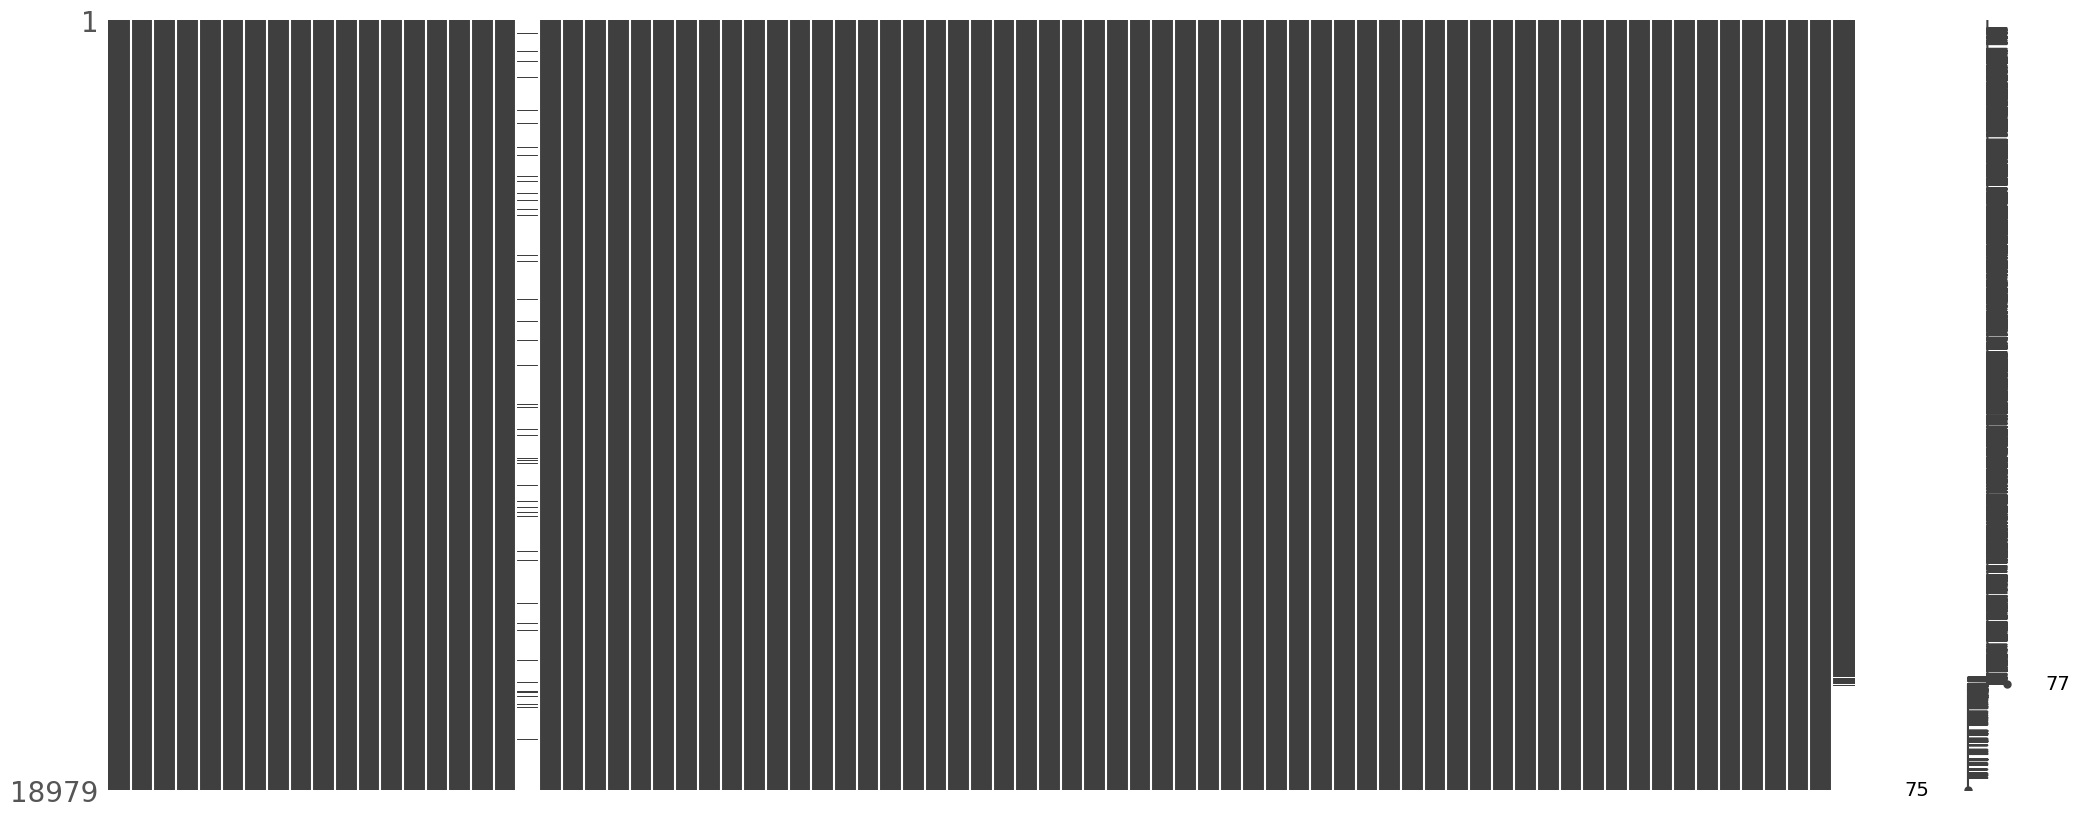

In [10]:
msn.matrix(df)

<Axes: >

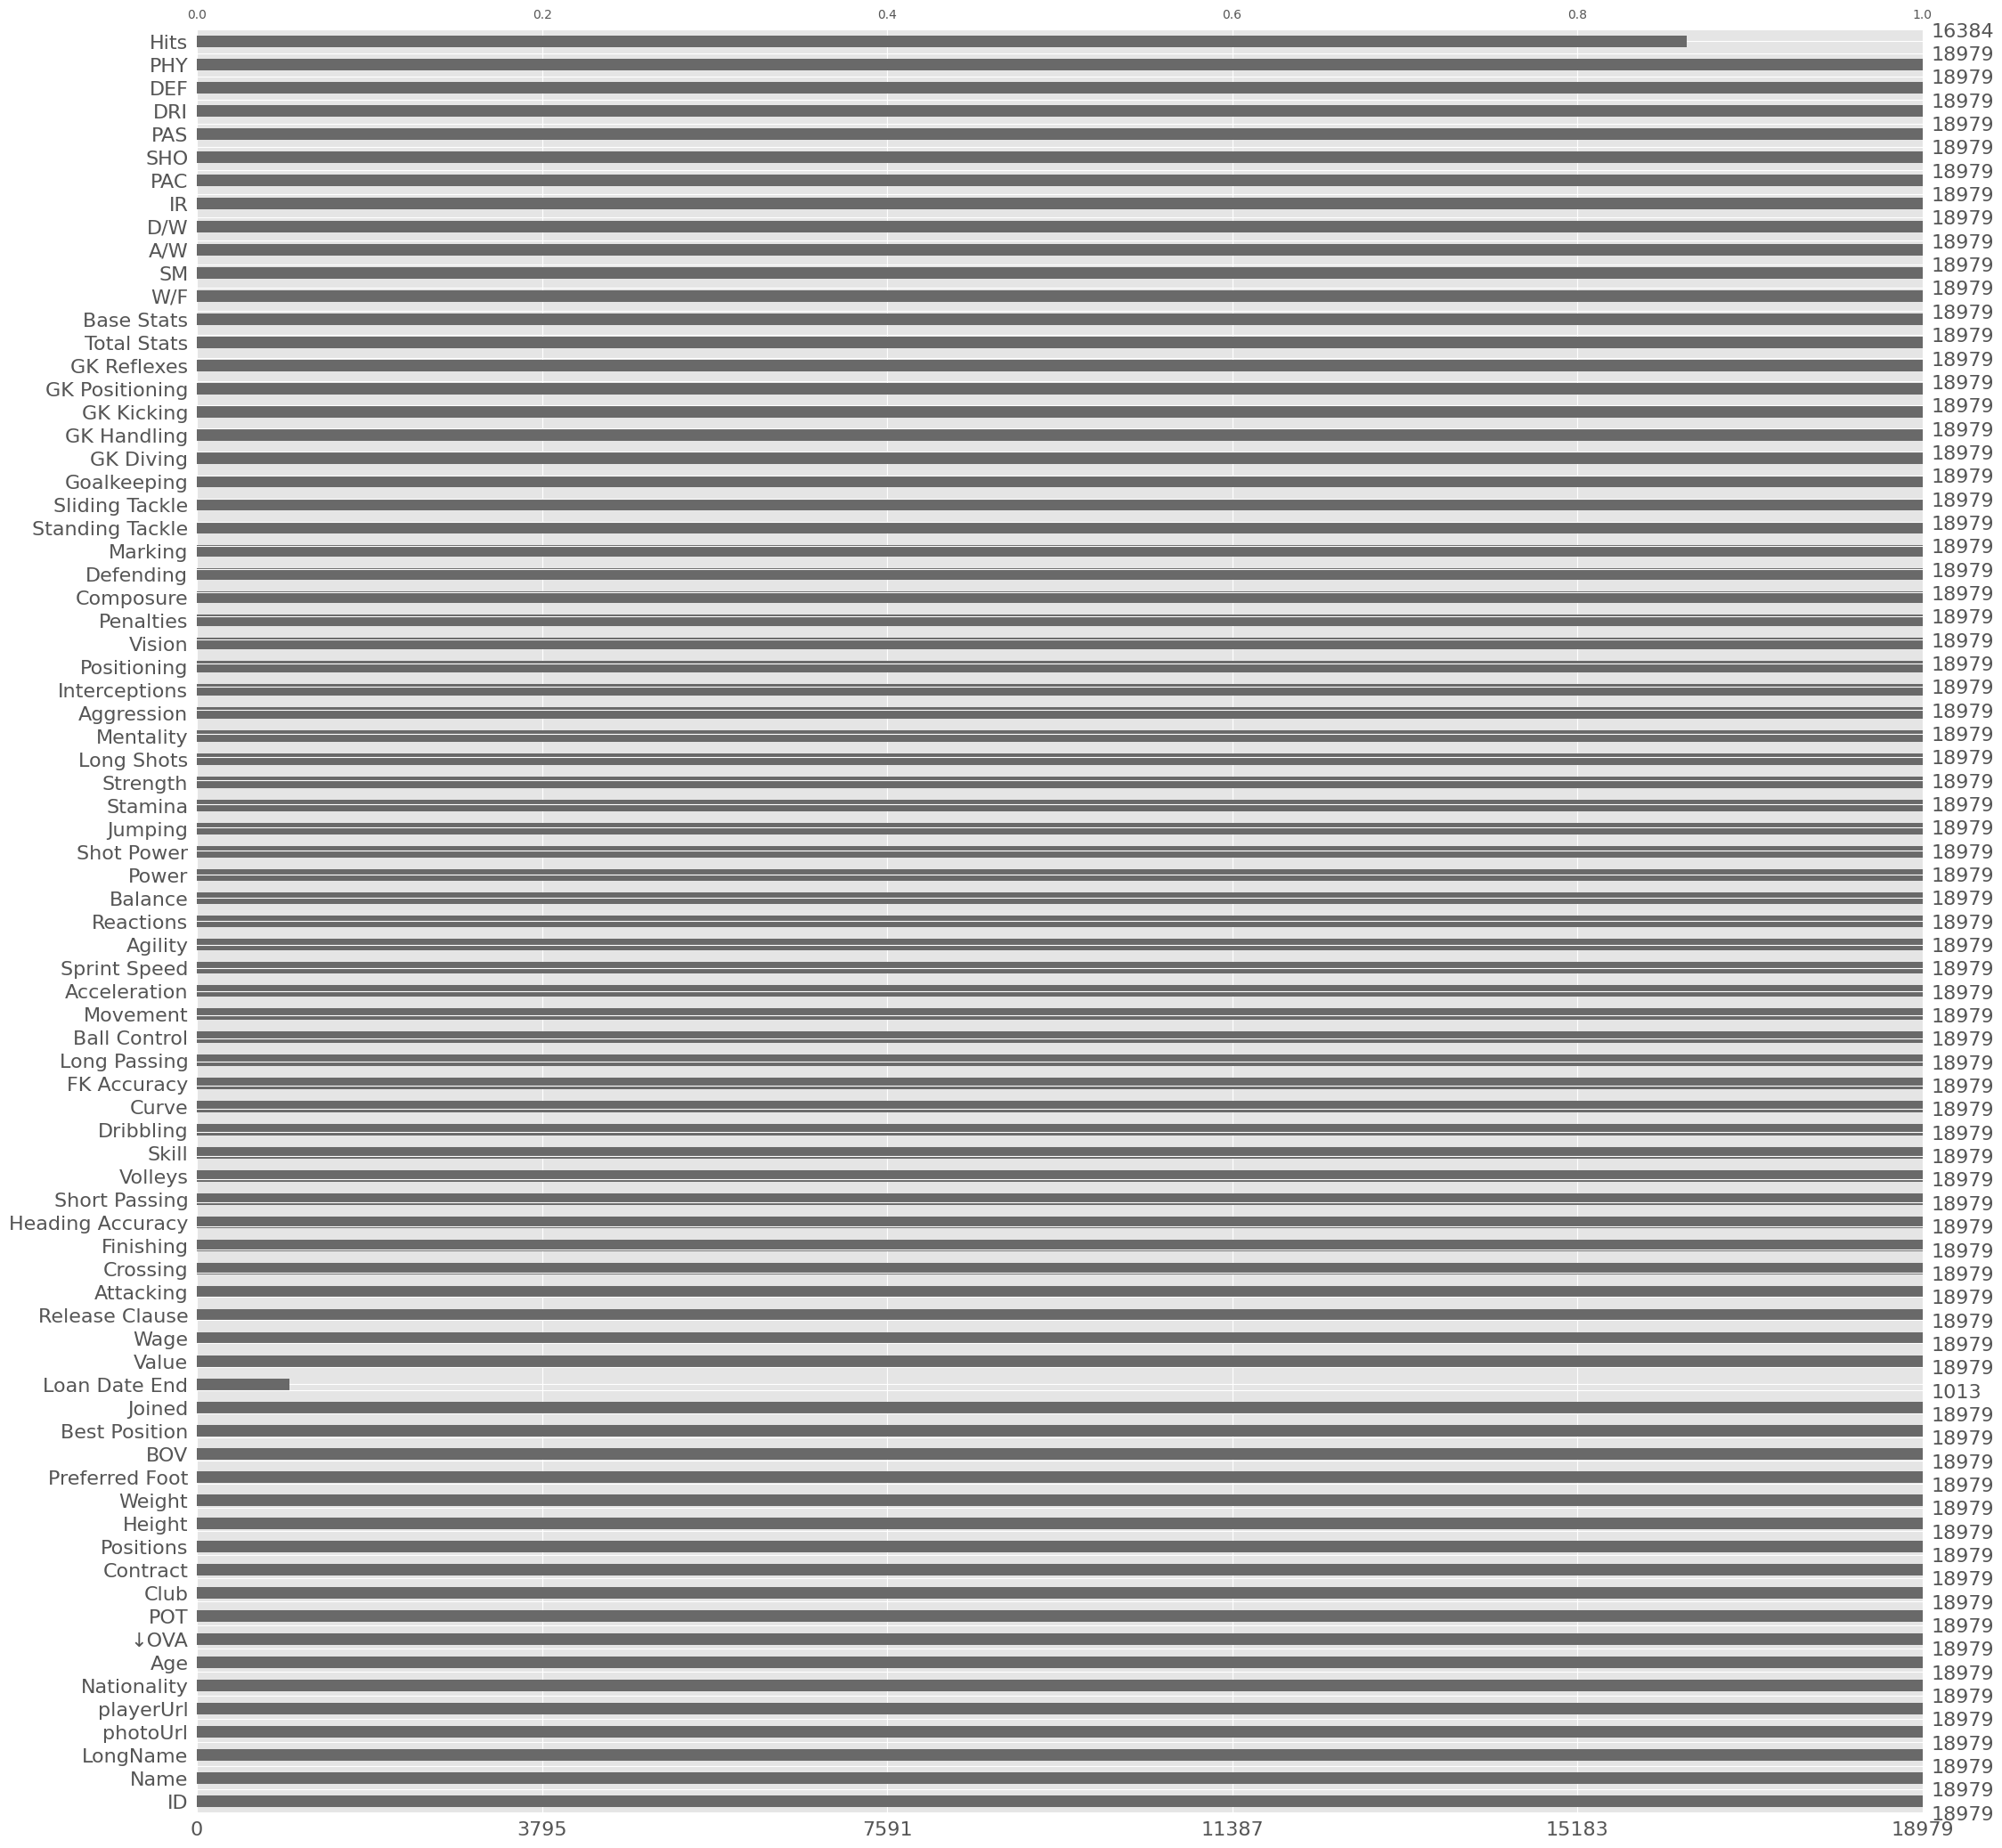

In [11]:
msn.bar(df) 

Text(0.5, 1.0, 'Pointing Null Values In Columns')

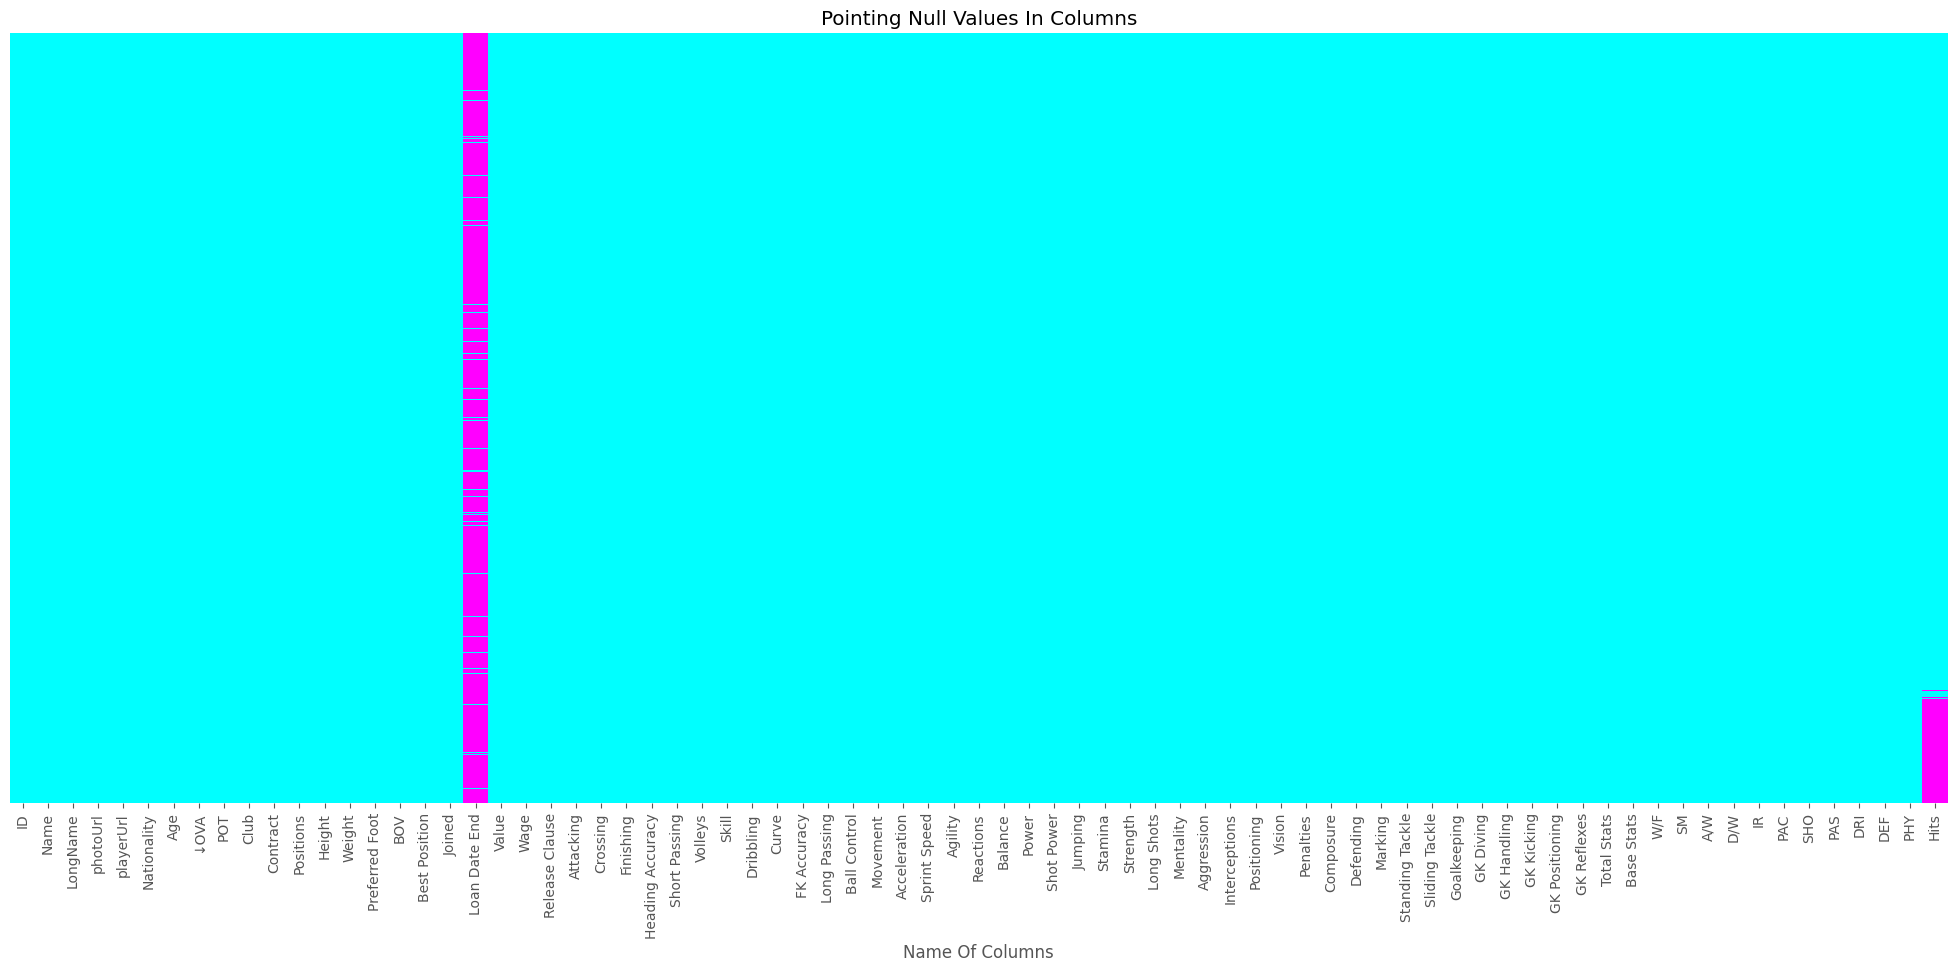

In [12]:
# Visulaizing null values through heatmap.
plt.figure(figsize=(25, 10))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False,cmap='cool')
plt.xlabel("Name Of Columns")
plt.title("Pointing Null Values In Columns")

In [13]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))
    

ID - 0.0%
Name - 0.0%
LongName - 0.0%
photoUrl - 0.0%
playerUrl - 0.0%
Nationality - 0.0%
Age - 0.0%
↓OVA - 0.0%
POT - 0.0%
Club - 0.0%
Contract - 0.0%
Positions - 0.0%
Height - 0.0%
Weight - 0.0%
Preferred Foot - 0.0%
BOV - 0.0%
Best Position - 0.0%
Joined - 0.0%
Loan Date End - 0.9466252173454871%
Value - 0.0%
Wage - 0.0%
Release Clause - 0.0%
Attacking - 0.0%
Crossing - 0.0%
Finishing - 0.0%
Heading Accuracy - 0.0%
Short Passing - 0.0%
Volleys - 0.0%
Skill - 0.0%
Dribbling - 0.0%
Curve - 0.0%
FK Accuracy - 0.0%
Long Passing - 0.0%
Ball Control - 0.0%
Movement - 0.0%
Acceleration - 0.0%
Sprint Speed - 0.0%
Agility - 0.0%
Reactions - 0.0%
Balance - 0.0%
Power - 0.0%
Shot Power - 0.0%
Jumping - 0.0%
Stamina - 0.0%
Strength - 0.0%
Long Shots - 0.0%
Mentality - 0.0%
Aggression - 0.0%
Interceptions - 0.0%
Positioning - 0.0%
Vision - 0.0%
Penalties - 0.0%
Composure - 0.0%
Defending - 0.0%
Marking - 0.0%
Standing Tackle - 0.0%
Sliding Tackle - 0.0%
Goalkeeping - 0.0%
GK Diving - 0.0%
GK Han

### Check Duplicate Rows

In [14]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
30       False
31       False
32       False
33       False
34       False
35       False
36       False
37       False
38       False
39       False
40       False
41       False
42       False
43       False
44       False
45       False
46       False
47       False
48       False
49       False
50       False
51       False
52       False
53       False
54       False
55       False
56       False
57       False
58       False
59       False
60       False
61       False
62       False
63       False
64       False
65       False
66       F

In [15]:
# Checking For the Duplicate Rows.
df.duplicated().value_counts() #True means duplicate rows.

False    18979
dtype: int64

### Drop Columns

In [16]:

# drop column 'Loan Date End' and modify the original DataFrame (because too much missing data in this columns)
df.drop('Loan Date End', axis=1, inplace=True)

In [17]:
#Photo_URl and Player_url are not accessible so it’s better to drop those columns.
df = df.drop(['photoUrl', 'playerUrl'], axis=1)

### Processing Hits column with cleaning and convert it into standard format

In [18]:
#cleaning hits column from object format to int objects 
hits = []
for x in range(len(df["Hits"])):
    value = df["Hits"][x]
    if pd.isna(value):
        hits.append(value)
    else:
        value = str(value).strip().replace('$', '').replace(',', '')
        if value[-1] == 'K':
            value = round(float(value[:-1]) * 1000)
        else:
            value = round(float(value))
        hits.append(value)
df['Hits'] = hits


This code is processing the 'Hits' column of a Pandas DataFrame by cleaning the data and converting it into a standardized format.

Here's how the code works:

1. hits = []: Initializes an empty list called hits. This list will hold the cleaned and standardized values for the 'Hits' column.
2. for x in range(len(df["Hits"])):: Loops over each index of the 'Hits' column.
3. value = df["Hits"][x]: Gets the value of the 'Hits' column at the current index and assigns it to the variable value.
4. if pd.isna(value):: Checks if the value is null or NaN. If it is, it appends the null value to the hits list.
5. else: value = str(value).strip().replace('`$`', '').replace(',', ''): If the value is not null, it is converted to a string and stripped of leading and trailing whitespaces. Any dollar signs '`$`' or commas ',' are also removed.
6. if value[-1] == 'K': value = round(float(value[:-1]) * 1000): Checks if the last character of the value is 'K', indicating that the value is in thousands. If it is, the value is converted to a float, the 'K' character is removed, and the value is multiplied by 1000 to get the actual value. The resulting value is then rounded to an integer.
7. else: value = round(float(value)): If the last character is not 'K', the value is converted to a float and rounded to an integer.
8. hits.append(value): The cleaned and standardized value is appended to the hits list.
9. df['Hits'] = hits: The 'Hits' column of the DataFrame is replaced with the cleaned and standardized values stored in the hits list.

Overall, this code is converting the 'Hits' column of the DataFrame into a standardized format by removing any non-numeric characters and converting values in thousands to their actual value. It also handles null or NaN values by appending them to the new list without any changes.

### Process Joined to proper Date-Time format

In [19]:
#will have to convert Joined to proper date-time format
df['Joined']

0         Jul 1, 2004
1        Jul 10, 2018
2        Jul 16, 2014
3        Aug 30, 2015
4         Aug 3, 2017
5         Jul 1, 2014
6         Jul 1, 2017
7        Jul 19, 2018
8         Jul 1, 2018
9         Jul 1, 2014
10        Jan 1, 2018
11        Jul 1, 2016
12       Jul 11, 2013
13        Aug 9, 2018
14        Jul 1, 2011
15        Jul 9, 2009
16        Aug 1, 2005
17       Jul 28, 2011
18       Jul 14, 2015
19       Jul 16, 2016
20        Jul 1, 2015
21        Jul 1, 2015
22        Jul 1, 2017
23        Jul 1, 2010
24        Jul 1, 2012
25        Jul 1, 2014
26        Jul 1, 2019
27       Jul 17, 2014
28       Jul 12, 2019
29       Aug 31, 2017
30        Oct 7, 2015
31        Jul 1, 2017
32       Jul 21, 2017
33       Jan 30, 2018
34       Jan 30, 2020
35        Jul 1, 2018
36       Aug 28, 2015
37        Jul 6, 2015
38        Sep 2, 2019
39        Jul 1, 2005
40        Sep 1, 2008
41       Jan 31, 2018
42       Jul 19, 2017
43        Aug 6, 2015
44        Aug 1, 2012
45       S

In [20]:
#Switching string of months to interger equivelents, wish we could use a case statement
def month_to_number(x):
            if x== 'Jan':
                return 1
            elif x == 'Feb':
                return 2
            elif x == 'Mar': 
                return 3
            elif x == 'Apr':
                return 4
            elif x == 'May':
                return 5
            elif x == 'Jun': 
                return 6
            elif x == 'Jul': 
                return 7
            elif x == 'Aug': 
                return 8
            elif x == 'Sep': 
                return 9
            elif x == 'Oct': 
                return 10
            elif x == 'Nov':  
                return 11
            elif x == 'Dec':  
                return 12

This code defines a function called month_to_number() that takes a string representing a month abbreviation (e.g. 'Jan', 'Feb', 'Mar') and returns an integer representing the equivalent month number (e.g. 1 for January, 2 for February, etc.).

The function works by checking the input string against each month abbreviation using a series of if and elif statements. If the input string matches a month abbreviation, the function returns the corresponding integer value. If the input string does not match any of the abbreviations, the function does not return anything (i.e. it implicitly returns None).

This function could be useful for tasks such as converting dates from a string format to a more standard format for analysis or visualization. However, note that Python already provides a built-in datetime module that can handle date/time operations more efficiently and accurately than this simple function.


In [21]:
date = []
for x in range(len(df['Joined'])):
    d = df['Joined'][x]
    c = d.split(" ")
    month = str(month_to_number(c[0]))
    day = str(c[1].replace(',',''))
    year = str(c[2])
    if len(day) == 1:
        day = ('0'+str(day))
    date_long = (str(month)+'/'+str(day)+'/'+str(year))
    date_con = pd.to_datetime(date_long)
    date.append(date_con)  

This code extracts date information from a column called 'Joined' in a pandas DataFrame called df. The code converts the date information in each row from a string format to a pandas Timestamp object.

Here's a breakdown of how the code works:

1. date = []: creates an empty list called date to store the converted date information.
2. for x in range(len(df['Joined'])):: iterates through each row in the 'Joined' column of the DataFrame.
3. d = df['Joined'][x]: assigns the value in the 'Joined' column of the current row to the variable d.
4. c = d.split(" "): splits the value in d into a list of strings using a space as the separator. This creates a list of three strings: the month abbreviation, the day of the month, and the year.
5. month = str(month_to_number(c[0])): calls a function called month_to_number() (which converts the month abbreviation to an integer) and assigns the result to the variable month.
6. day = str(c[1].replace(',','')): removes any commas from the day string using the replace() method and assigns the result to the variable day.
7. year = str(c[2]): assigns the year string to the variable year.
8. if len(day) == 1: day = ('0'+str(day)): adds a leading zero to the day string if it only has one digit. This ensures that the final date string has a consistent format.
9. date_long = (str(month)+'/'+str(day)+'/'+str(year)): concatenates the month, day, and year strings into a single string in the format "MM/DD/YYYY".
10. date_con = pd.to_datetime(date_long): uses the to_datetime() function from pandas to convert the date string to a pandas Timestamp object.
11. date.append(date_con): appends the Timestamp object to the date list.

After the code has iterated through all rows in the 'Joined' column, the date list will contain a Timestamp object for each row in the DataFrame. These Timestamp objects can be used for further analysis and visualization of the date information in the DataFrame.

In [22]:
df['Joined'] = date
df['Joined']

0       2004-07-01
1       2018-07-10
2       2014-07-16
3       2015-08-30
4       2017-08-03
5       2014-07-01
6       2017-07-01
7       2018-07-19
8       2018-07-01
9       2014-07-01
10      2018-01-01
11      2016-07-01
12      2013-07-11
13      2018-08-09
14      2011-07-01
15      2009-07-09
16      2005-08-01
17      2011-07-28
18      2015-07-14
19      2016-07-16
20      2015-07-01
21      2015-07-01
22      2017-07-01
23      2010-07-01
24      2012-07-01
25      2014-07-01
26      2019-07-01
27      2014-07-17
28      2019-07-12
29      2017-08-31
30      2015-10-07
31      2017-07-01
32      2017-07-21
33      2018-01-30
34      2020-01-30
35      2018-07-01
36      2015-08-28
37      2015-07-06
38      2019-09-02
39      2005-07-01
40      2008-09-01
41      2018-01-31
42      2017-07-19
43      2015-08-06
44      2012-08-01
45      2020-09-25
46      2012-08-31
47      2016-07-27
48      2008-08-10
49      2011-07-01
50      2013-07-05
51      2011-07-01
52      2012

This code updates the 'Joined' column in a pandas DataFrame called df with a new column containing Timestamp objects representing the dates in the original 'Joined' column.

Here's a breakdown of how the code works:

1. df['Joined'] = date: assigns the date list (which contains Timestamp objects for each row in the original 'Joined' column) to a new column in the DataFrame called 'Joined'. This overwrites the original 'Joined' column with the new column.
2. df['Joined']: retrieves the new 'Joined' column from the DataFrame. This line of code doesn't actually do anything by itself, but it can be useful for checking that the new column was created correctly.

Overall, this code replaces a column of string dates in a DataFrame with a new column of Timestamp objects, which can be more useful for analyzing and visualizing the date information in the DataFrame.

### Change Height column to inches

In [23]:
#height to inches 
temp_height = []
for x in range(len(df['Height'])):
    value = df['Height'][x]
    if pd.isna(value):
        temp_height.append(value)
    elif value.endswith('cm'):
        inches = int(float(value[:-2]) * 0.393701)
        temp_height.append(inches)
    else:
        x = value.replace('"', '').split("'")
        inches = int(x[0]) * 12 + int(x[1])
        temp_height.append(inches)
df['Height'] = temp_height


This code processes the 'Height' column of a pandas DataFrame called df to convert the height values from either centimeters or feet/inches to just inches. Here's a breakdown of how the code works:

1. temp_height = []: creates an empty list called 'temp_height' to store the new height values.
2. for x in range(len(df['Height'])):: loops through each row in the 'Height' column of the DataFrame.
3. value = df['Height'][x]: assigns the value in the current row of the 'Height' column to the variable 'value'.
3. if pd.isna(value):: checks if the value is missing (i.e., NaN). If so, it appends the missing value to the 'temp_height' list.
4. elif value.endswith('cm'):: checks if the height is in centimeters. If so, it converts the value to inches using the formula inches = int(float(value[:-2]) * 0.393701) and appends the result to the 'temp_height' list.
5. else:: if the height is not in centimeters, it assumes that it is in feet/inches and converts it to inches using the formula inches = int(x[0]) * 12 + int(x[1]), where 'x' is a list of strings obtained by removing the double quotes and splitting the value on the single quote. The resulting inches value is then appended to the 'temp_height' list.
6. df['Height'] = temp_height: assigns the 'temp_height' list as the new values for the 'Height' column in the DataFrame. This overwrites the original 'Height' column with the new values.

Overall, this code is a useful data cleaning step that standardizes the format of height values in the 'Height' column of the DataFrame to a single unit (inches), making it easier to work with and analyze the data.

### Change weight to standard format lbs

In [24]:
#weight in lbs
temp_weight= []
for x in range(len(df['Weight'])):
    value = df['Weight'][x]
    if 'lbs' in value:
        value = int(value.replace('lbs',''))
    elif 'kg' in value:
        value = int(float(value.replace('kg','')) * 2.20462) # convert kg to lbs
    temp_weight.append(value)
    
df['Weight'] = temp_weight
df['Weight']


0        158
1        182
2        191
3        154
4        149
5        176
6        156
7        200
8        160
9        187
10       202
11       152
12       185
13       211
14       202
15       178
16       180
17       154
18       152
19       154
20       160
21       165
22       189
23       196
24       202
25       196
26       163
27       167
28       160
29       167
30       152
31       141
32       141
33       187
34       152
35       171
36       171
37       167
38       176
39       187
40       167
41       176
42       198
43       152
44       145
45       182
46       180
47       187
48       165
49       180
50       160
51       178
52       132
53       185
54       163
55       187
56       207
57       174
58       147
59       149
60       149
61       176
62       180
63       167
64       171
65       182
66       196
67       176
68       154
69       198
70       165
71       165
72       143
73       178
74       165
75       147
76       154

This code appears to be processing data related to the weight of some objects or entities, where the weight is provided in different units of measurement (pounds or kilograms) in a Pandas DataFrame called df. The code aims to standardize the units of measurement to pounds (lbs) for consistency.

Here is a step-by-step explanation of the code:

1. temp_weight = []: This creates an empty list called temp_weight to store the standardized weights.
2. for x in range(len(df['Weight'])):: This sets up a loop that will iterate over each element in the Weight column of the DataFrame.
3. value = df['Weight'][x]: This retrieves the weight value of the current element in the loop and assigns it to the variable value.
4. if 'lbs' in value:: This checks whether the weight value contains the string "lbs", which indicates that the weight is already in pounds.
5. value = int(value.replace('lbs','')): If the weight is in pounds, this line removes the string "lbs" from the weight value and converts it to an integer using the int() function.
6. elif 'kg' in value:: If the weight is not in pounds, this line checks whether the weight contains the string "kg", which indicates that it is in kilograms.
7. value = int(float(value.replace('kg','')) * 2.20462): If the weight is in kilograms, this line removes the string "kg" from the weight value, converts it to a float using the float() function, multiplies it by the conversion factor from kilograms to pounds (2.20462), and converts the result to an integer using the int() function.
8. temp_weight.append(value): This adds the standardized weight value to the temp_weight list.
9. df['Weight'] = temp_weight: This updates the Weight column of the DataFrame with the standardized weight values stored in temp_weight.
10. df['Weight']: This line is not strictly necessary for the code to run, but it retrieves and displays the Weight column of the DataFrame to show the standardized weights.

### Process Value into integer format

In [25]:
#value
temp_value = []
for x in range(len(df['Value'])):
    value = df['Value'][x]
    value = value.replace('€','')
    value = value.replace('K','000')
    value = value.replace('M','000000')
    value = value.replace('.','F')
    if  'F' in value:
        value = value.replace('F','')
        value = value = int(value) / 10
    temp_value.append(int(value))

df['Value']= temp_value
df['Value']

0        103500000
1         63000000
2        120000000
3        129000000
4        132000000
5        111000000
6        120500000
7        102000000
8        185500000
9        110000000
10       113000000
11       120500000
12        90500000
13        82000000
14        17500000
15        83500000
16        33500000
17        83500000
18       114500000
19        78000000
20       103000000
21       109000000
22        92000000
23       109000000
24        10000000
25        76500000
26        89500000
27        87500000
28        79500000
29       124000000
30       114000000
31        95000000
32        90500000
33        92500000
34       105500000
35        88500000
36        85000000
37        81500000
38        26000000
39        21000000
40        56000000
41        67500000
42        53000000
43        63000000
44        36500000
45        51000000
46        26000000
47        78000000
48        65500000
49        46500000
50        61500000
51        72500000
52        77

This code is processing data related to the monetary value of some objects or entities, where the value is provided in Euros in a Pandas DataFrame called df. The code aims to standardize the representation of the values in terms of the number of Euros.

Here is a step-by-step explanation of the code:

1. temp_value = []: This creates an empty list called temp_value to store the standardized values.
2. for x in range(len(df['Value'])):: This sets up a loop that will iterate over each element in the Value column of the DataFrame.
3. value = df['Value'][x]: This retrieves the value of the current element in the loop and assigns it to the variable value.
4. value = value.replace('€',''): This line removes the Euro symbol "€" from the value string using the replace() function.
5. value = value.replace('K','000'): This line replaces the letter "K" (used as an abbreviation for thousand) with the string "000" using the replace() function.
6. value = value.replace('M','000000'): This line replaces the letter "M" (used as an abbreviation for million) with the string "000000" using the replace() function.
7. value = value.replace('.','F'): This line replaces the decimal point "." with the letter "F" using the replace() function. This is done to handle cases where the values use a comma "," as a decimal separator, as the code assumes that the values are written in the English format with a dot as a decimal separator.
8. if 'F' in value:: This checks whether the letter "F" is in the value string, which indicates that the value uses a comma as a decimal separator.
9. value = value.replace('F',''): If the value uses a comma as a decimal separator, this line removes the letter "F" from the value string using the replace() function.
10. value = int(value) / 10: If the value uses a comma as a decimal separator, this line converts the value to an integer using the int() function and divides it by 10 to shift the decimal point one place to the left.
11. temp_value.append(int(value)): This adds the standardized value to the temp_value list. The value is converted to an integer using the int() function, which discards any decimal places.
12. df['Value']= temp_value: This updates the Value column of the DataFrame with the standardized values stored in temp_value.
13. df['Value']: This line is not strictly necessary for the code to run, but it retrieves and displays the Value column of the DataFrame to show the standardized values.

### Process Wage into standarize value

In [26]:
#Wage
Temp_Wage = []
for x in range(len(df['Wage'])):
    Wage = df['Wage'][x]
    Wage = Wage.replace('€','')
    Wage = Wage.replace('K','000')
    Wage = Wage.replace('M','000000')
    Wage = Wage.replace('.','F')
    if  'F' in Wage:
        Wage = Wage.replace('F','')
        Wage = Wage = int(Wage) / 10
    Temp_Wage.append(int(Wage))

df['Wage']= Temp_Wage
df['Wage']

0        560000
1        220000
2        125000
3        370000
4        270000
5        240000
6        250000
7        160000
8        160000
9        260000
10       210000
11       250000
12       310000
13       250000
14       130000
15       350000
16       300000
17       300000
18       270000
19       190000
20       145000
21       190000
22       195000
23       220000
24       100000
25       140000
26       350000
27       310000
28       290000
29        82000
30       110000
31       230000
32       155000
33       200000
34       195000
35       155000
36       165000
37       190000
38       110000
39        95000
40       240000
41       170000
42       105000
43       160000
44       260000
45       115000
46       125000
47       125000
48       130000
49       150000
50       230000
51       220000
52       135000
53       190000
54       160000
55       220000
56        95000
57        55000
58        58000
59       100000
60       220000
61       140000
62      

This code is processing data related to the wages of some objects or entities, where the wage is provided in Euros in a Pandas DataFrame called df. The code aims to standardize the representation of the wages in terms of the number of Euros.

Here is a step-by-step explanation of the code:

1. Temp_Wage = []: This creates an empty list called Temp_Wage to store the standardized wages.
2. for x in range(len(df['Wage'])):: This sets up a loop that will iterate over each element in the Wage column of the DataFrame.
3. Wage = df['Wage'][x]: This retrieves the wage of the current element in the loop and assigns it to the variable Wage.
4. Wage = Wage.replace('€',''): This line removes the Euro symbol "€" from the wage string using the replace() function.
5. Wage = Wage.replace('K','000'): This line replaces the letter "K" (used as an abbreviation for thousand) with the string "000" using the replace() function.
6. Wage = Wage.replace('M','000000'): This line replaces the letter "M" (used as an abbreviation for million) with the string "000000" using the replace() function.
7. Wage = Wage.replace('.','F'): This line replaces the decimal point "." with the letter "F" using the replace() function. This is done to handle cases where the wages use a comma "," as a decimal separator, as the code assumes that the wages are written in the English format with a dot as a decimal separator.
8. if 'F' in Wage:: This checks whether the letter "F" is in the wage string, which indicates that the wage uses a comma as a decimal separator.
9. Wage = Wage.replace('F',''): If the wage uses a comma as a decimal separator, this line removes the letter "F" from the wage string using the replace() function.
10. Wage = int(Wage) / 10: If the wage uses a comma as a decimal separator, this line converts the wage to an integer using the int() function and divides it by 10 to shift the decimal point one place to the left.
11. Temp_Wage.append(int(Wage)): This adds the standardized wage to the Temp_Wage list. The wage is converted to an integer using the int() function, which discards any decimal places.
12. df['Wage']= Temp_Wage: This updates the Wage column of the DataFrame with the standardized wages stored in Temp_Wage.
13. df['Wage']: This line is not strictly necessary for the code to run, but it retrieves and displays the Wage column of the DataFrame to show the standardized wages.

### Process Release Clause into standarize value

In [27]:
# define a function to convert value to integer
def convert_value(val):
    if val[-1] == 'M':
        return int(float(re.sub('[^0-9.]', '', val)) * 1000000)
    elif val[-1] == 'K':
        return int(float(re.sub('[^0-9.]', '', val)) * 1000)
    else:
        return int(re.sub('[^0-9.]', '', val))

# convert "Value", "Wage", and "Release Clause" columns to integer
df['Release Clause'] = df['Release Clause'].apply(convert_value)

define a function to convert value to integer: This is a comment that explains what the code is going to do. It defines a function that will convert a string value to an integer.
1. def convert_value(val):: This line defines a function called convert_value that takes one parameter called val. The parameter is a string value that needs to be converted to an integer.
2. if val[-1] == 'M':: This line starts an if statement that checks if the last character of the val parameter is equal to 'M'.
3. return int(float(re.sub('[^0-9.]', '', val)) * 1000000): If the if condition is true, this line returns the result of a calculation that converts the string value to a float number, removes any characters that are not digits or decimals from the string using regular expression, multiplies the float number by 1000000, and converts the result to an integer.
4. elif val[-1] == 'K':: This line starts an elif statement that checks if the last character of the val parameter is equal to 'K'.
5. return int(float(re.sub('[^0-9.]', '', val)) * 1000): If the elif condition is true, this line returns the result of a calculation that converts the string value to a float number, removes any characters that are not digits or decimals from the string using regular expression, multiplies the float number by 1000, and converts the result to an integer.
6. else:: This line starts an else statement that executes if none of the previous conditions are true.
7. return int(re.sub('[^0-9.]', '', val)): If the else condition is true, this line returns the result of a calculation that removes any characters that are not digits or decimals from the string using regular expression and converts the result to an integer.
8. df['Release Clause'] = df['Release Clause'].apply(convert_value): This line applies the convert_value function to the 'Release Clause' column of a pandas dataframe called df. It converts the values in that column from strings to integers and modifies the df dataframe in place.

### sorts and groups the positions in the DataFrame and then displays the unique groups of positions.

In [28]:
#positions
df['Positions'].unique()
#far too many unique groupings of positions will need to order them to reduce size

array(['RW, ST, CF', 'ST, LW', 'GK', 'CAM, CM', 'LW, CAM', 'ST', 'RW',
       'ST, LW, RW', 'CB', 'LW', 'CDM', 'CF, ST', 'LW, RW', 'CDM, CM',
       'CDM, RB', 'CF, CAM', 'LW, ST', 'CM', 'ST, CF, LW', 'RM, LM, CAM',
       'RB', 'RW, CAM, CM', 'LB', 'LM, CF', 'CF', 'RW, LW', 'CAM, RM, RW',
       'CM, CDM', 'CAM, CF, ST', 'CM, CDM, CAM', 'CF, LW, CAM',
       'CAM, RM, CF', 'LM, ST', 'RM, LM, RW', 'LM', 'CAM, RW', 'CB, CDM',
       'RW, RM', 'LW, CF', 'CM, RM, LM', 'LB, LM', 'CAM, CM, RM',
       'CAM, CM, CF', 'CAM, CF', 'LM, RM, LW', 'LM, LB, CM', 'CM, LM, LB',
       'RM, RW', 'RM, CM', 'CAM, CM, LW', 'CB, LB', 'RM, RB', 'ST, RW',
       'LM, RW, LW', 'RB, LB', 'RB, RM', 'RM', 'LM, RM, CF', 'CAM, RM',
       'RB, RWB', 'CDM, CB, CM', 'CAM, RM, ST', 'LM, LW, RM', 'CM, CAM',
       'ST, RM, CF', 'LM, RM', 'RM, CF', 'LM, LWB', 'RW, RM, CF',
       'RB, CM', 'LW, CAM, RW', 'CAM, LW, CM', 'CM, CAM, CDM',
       'RW, LW, CAM', 'CM, CAM, LM', 'CM, RM, ST', 'CDM, CM, RB',
       'ST, CAM', 

This code is related to the positions of some objects or entities in a Pandas DataFrame called df. Specifically, it checks the unique values of the Positions column in the DataFrame and displays them.

Here is an explanation of the code:

1. df['Positions'].unique(): This retrieves the unique values in the Positions column of the DataFrame using the unique() function.
2. The output of the code will be the list of all unique groupings of positions present in the Positions column of the DataFrame.
3. The comment #far too many unique groupings of positions will need to order them to reduce size suggests that there are many unique groupings of positions in the DataFrame, which may make it difficult to analyze or visualize the data. The author of the code plans to order the positions to reduce the number of unique groupings and make the data more manageable.
4. However, the code as it stands does not actually perform any ordering or grouping of the positions. It simply displays the unique values. The code that orders or groups the positions would need to be written separately.

In [29]:
temp_position = []
for x in range(len(df['Positions'])):
    y = sorted(df['Positions'][x].split(" "))
    yx = ' '.join(y)
    temp_position.append(yx)

df['Positions'] = temp_position
df['Positions'] = df['Positions'].astype(object)
df['Positions'].unique()
#ordered the list of positions leaving them in groups

array(['CF RW, ST,', 'LW ST,', 'GK', 'CAM, CM', 'CAM LW,', 'ST', 'RW',
       'LW, RW ST,', 'CB', 'LW', 'CDM', 'CF, ST', 'LW, RW', 'CDM, CM',
       'CDM, RB', 'CAM CF,', 'LW, ST', 'CM', 'CF, LW ST,', 'CAM LM, RM,',
       'RB', 'CAM, CM RW,', 'LB', 'CF LM,', 'CF', 'LW RW,', 'CAM, RM, RW',
       'CDM CM,', 'CAM, CF, ST', 'CAM CDM, CM,', 'CAM CF, LW,',
       'CAM, CF RM,', 'LM, ST', 'LM, RM, RW', 'LM', 'CAM, RW', 'CB, CDM',
       'RM RW,', 'CF LW,', 'CM, LM RM,', 'LB, LM', 'CAM, CM, RM',
       'CAM, CF CM,', 'CAM, CF', 'LM, LW RM,', 'CM LB, LM,', 'CM, LB LM,',
       'RM, RW', 'CM RM,', 'CAM, CM, LW', 'CB, LB', 'RB RM,', 'RW ST,',
       'LM, LW RW,', 'LB RB,', 'RB, RM', 'RM', 'CF LM, RM,', 'CAM, RM',
       'RB, RWB', 'CB, CDM, CM', 'CAM, RM, ST', 'LM, LW, RM', 'CAM CM,',
       'CF RM, ST,', 'LM, RM', 'CF RM,', 'LM, LWB', 'CF RM, RW,',
       'CM RB,', 'CAM, LW, RW', 'CAM, CM LW,', 'CAM, CDM CM,',
       'CAM LW, RW,', 'CAM, CM, LM', 'CM, RM, ST', 'CDM, CM, RB',
       'CAM ST,', 

This code is related to the Positions column of a Pandas DataFrame called df. The code first sorts and groups the positions in the DataFrame and then displays the unique groups of positions.

Here is an explanation of the code:

1. temp_position = []: This creates an empty list called temp_position.
2. for x in range(len(df['Positions'])):: This loops through each element of the Positions column of the DataFrame.
3. y = sorted(df['Positions'][x].split(" ")): This splits the Positions element into a list of individual positions and sorts them in alphabetical order using the sorted() function.
4. yx = ' '.join(y): This joins the sorted positions back together into a single string with a space between each position using the join() function.
5. temp_position.append(yx): This adds the sorted and grouped position to the temp_position list.
6. df['Positions'] = temp_position: This replaces the original Positions column in the DataFrame with the sorted and grouped temp_position list.
7. df['Positions'] = df['Positions'].astype(object): This converts the data type of the Positions column to object to avoid any potential data type issues.
8. df['Positions'].unique(): This displays the unique groups of positions in the Positions column of the DataFrame.

The comment #ordered the list of positions leaving them in groups indicates that the positions have been sorted and grouped, making it easier to analyze and visualize the data.

### Cleaning Club Column

In [30]:
# remove newline character from column name 'club'
df['Club'] = df['Club'].str.replace('\n','')

This code is related to the Club column of a Pandas DataFrame called df. The code removes the newline character (\n) from the Club column.

Here is an explanation of the code:

1. df['Club']: This selects the Club column of the DataFrame.
2. .str: This indicates that the str (string) accessor will be used to perform string operations on the selected column.
3. .replace('\n',''): This replaces all occurrences of the newline character (\n) in the Club column with an empty string ('').
4. df['Club'] = ...: This replaces the original Club column in the DataFrame with the modified Club column.

The purpose of removing the newline character from the Club column is to ensure that the column data is consistent and can be more easily analyzed and visualized. The newline character may cause issues with formatting or data manipulation.

### ‘W/F’, ‘SM’, and ‘IR’, Columns have * so we need to get rid of that and then change the data type to numeric.

In [31]:
# Loop over the specified columns, remove the star character, and convert to numeric
for col in ['W/F', 'SM', 'IR']:
    df[col] = pd.to_numeric(df[col].str.replace('★', ''))

1. for col in ['W/F', 'SM', 'IR']:: This is a for loop that iterates over a list of column names. The three column names are 'W/F', 'SM', and 'IR'.
2. df[col]: This accesses the column with the name stored in the variable "col".
3. df[col].str.replace('★', ''): This uses the string method "replace" to replace any occurrences of the star character (★) in the column with an empty string (''). This returns a new series with the replacements made.
4. pd.to_numeric(): This is a pandas function that converts a series or dataframe to numeric data type.
5. pd.to_numeric(df[col].str.replace('★', '')): This converts the series with the star characters removed to a numeric data type.
6. df[col] = pd.to_numeric(df[col].str.replace('★', '')): This replaces the original column with the converted numeric series.

In [32]:
df[['W/F', 'SM', 'IR']]

W/F  SM  IR
0        4   4   5
1        4   5   5
2        3   1   3
3        5   4   4
4        5   5   5
5        4   4   4
6        3   4   3
7        3   1   3
8        4   5   3
9        4   1   3
10       3   2   3
11       4   4   3
12       3   2   3
13       3   1   4
14       4   1   5
15       4   4   4
16       3   3   4
17       4   4   4
18       3   4   3
19       3   2   3
20       4   3   3
21       3   4   3
22       3   1   2
23       4   3   3
24       3   1   3
25       3   2   3
26       4   4   4
27       5   3   4
28       3   4   4
29       3   5   3
30       4   3   2
31       3   4   2
32       2   3   3
33       3   2   2
34       4   4   2
35       2   3   3
36       5   4   3
37       4   5   3
38       3   1   3
39       3   2   4
40       3   3   4
41       4   4   3
42       3   1   3
43       2   5   4
44       4   4   4
45       4   3   5
46       1   1   4
47       4   3   3
48       4   3   4
49       3   1   4
50       3   3   3
51       3   2   3
52       4   4   3
53       4   5   4
54       3   3   3
55       3   2   4
56       3   3   4
57       4   1   3
58       2   4   4
59       4   4   3
60       3   3   3
61       3   3   2
62       4   3   2
63       4   4   2
64       3   5   3
65       4   4   3
66       4   2   3
67       4   2   1
68       4   5   2
69       3   1   3
70       4   4   3
71       3   4   2
72       2   5   3
73       4   2   2
74       3   3   3
75       4   5   3
76       4   3   3
77       4   3   3
78       4   3   2
79       4   3   3
80       3   4   3
81       4   4   3
82       3   2   3
83       3   2   4
84       4   3   3
85       3   1   3
86       4   3   3
87       3   3   3
88       3   5   3
89       2   3   3
90       5   4   3
91       2   1   2
92       4   2   3
93       4   4   3
94       3   4   2
95       3   2   3
96       4   4   3
97       4   3   3
98       4   4   4
99       4   3   1
100      3   2   2
101      3   1   3
102      4   4   3
103      3   3   1
104      4   4   1
105      3   3   2
106      2   3   3
107      3   4   3
108      2   3   3
109      3   4   2
110      3   2   2
111      2   4   3
112      3   4   3
113      3   2   3
114      4   3   3
115      4   3   3
116      3   3   2
117      5   4   2
118      2   3   3
119      4   3   3
120      4   3   2
121      2   3   2
122      2   1   3
123      4   4   3
124      3   3   3
125      4   3   3
126      3   4   3
127      4   3   4
128      3   3   2
129      5   4   3
130      4   3   2
131      3   5   3
132      4   2   3
133      4   3   3
134      3   3   3
135      3   2   3
136      2   1   3
137      3   1   2
138      4   4   3
139      2   1   3
140      4   3   4
141      2   4   2
142      2   3   1
143      5   4   1
144      5   5   3
145      4   4   2
146      4   4   1
147      2   4   1
148      3   3   1
149      4   4   3
150      3   4   2
151      2   4   2
152      3   3   2
153      2   5   3
154      3   3   3
155      3   1   1
156      2   1   1
157      4   3   2
158      3   3   1
159      4   3   1
160      3   4   2
161      3   4   2
162      4   4   3
163      2   1   1
164      2   3   2
165      3   4   2
166      3   4   3
167      3   4   2
168      3   2   2
169      3   4   2
170      4   4   2
171      3   2   3
172      3   3   2
173      4   3   1
174      4   3   3
175      4   3   2
176      4   4   3
177      3   4   2
178      3   3   2
179      3   4   3
180      2   2   3
181      4   3   2
182      3   4   3
183      2   1   2
184      4   3   2
185      2   2   2
186      2   1   1
187      4   4   3
188      3   5   2
189      2   2   3
190      3   1   2
191      3   4   2
192      4   5   4
193      3   4   3
194      2   1   2
195      3   3   2
196      4   4   3
197      4   1   2
198      4   4   3
199      3   3   2
200      3   4   2
201      4   3   4
202      5   2   3
203      3   3   3
204      4   5   4
205      3   4   4
206      4   4   3
207      3   3   3
208      3   1   3
209      4   5   

### Change data in Contract column

some players are on contract while some are on loan, in other to make the column type uniform, we give players with active contract as active while the ones on loan should be categorized as on loan

In [33]:
# define a function to change the values with 'on loan' as an "On loan" category
# define the players with active loans as Active and they can be located easily cause they contain '~'
def contract(a):
    if "On Loan" in a:
        a = 'ON LOAN'
        return a
    elif '~' in a:
        a = 'ACTIVE'
        return a
    elif 'Free' in a:
        a = "FREE"
        return a

1. ```def contract(a):``` This line is defining a function called "contract" that takes one parameter, "a".
2.  ```if "On Loan" in a:
        a = 'ON LOAN'
        return a```
    This block of code checks if the string "On Loan" is in the parameter "a". If it is, the value of "a" is changed to "ON LOAN" and then returned.
3.  ```elif '~' in a:
        a = 'ACTIVE'
        return a```
    This block of code checks if the character "~" is in the parameter "a". If it is, the value of "a" is changed to "ACTIVE" and then returned.
4. ```elif 'Free' in a:
        a = "FREE"
        return a```
   This block of code checks if the string "Free" is in the parameter "a". If it is, the value of "a" is changed to "FREE" and then returned.

this function takes a string as input and changes its value to one of three categories: "ON LOAN" if the string contains "On Loan", "ACTIVE" if the string contains a tilde (~), and "FREE" if the string contains "Free". The updated string is then returned.

In [34]:
df.Contract = df.Contract.apply(contract)

In [35]:
df.Contract.unique()

array(['ACTIVE', 'ON LOAN', 'FREE'], dtype=object)

In [36]:
df.Contract = df.Contract.astype('category')

In [37]:
# Rename the column to Contract status
df = df.rename(columns={'Contract':'ContractStatus'})

### Change Columns

#### Change the column name

In [38]:
# change longname and photourl columns name to better readbility
df = df.rename(columns={'LongName': 'Full Name', 'photoUrl': 'Photo_Url', 'playerUrl': 'Player_Url'})

#### Remove unwanted characters

In [39]:
# there is unwanted characters in contract columns (~) change it into -

In [40]:
# df['Contract'] = df['Contract'].str.replace('~', '-')

In [41]:
df_clean = df.copy()

In [42]:
df_clean.head()

ID               Name                     Full Name Nationality  Age  \
0  158023           L. Messi                  Lionel Messi   Argentina   33   
1   20801  Cristiano Ronaldo  C. Ronaldo dos Santos Aveiro    Portugal   35   
2  200389           J. Oblak                     Jan Oblak    Slovenia   27   
3  192985       K. De Bruyne               Kevin De Bruyne     Belgium   29   
4  190871          Neymar Jr    Neymar da Silva Santos Jr.      Brazil   28   

   ↓OVA  POT                 Club ContractStatus   Positions  Height  Weight  \
0    93   93         FC Barcelona         ACTIVE  CF RW, ST,      66     158   
1    92   92             Juventus         ACTIVE      LW ST,      73     182   
2    91   93      Atlético Madrid         ACTIVE          GK      74     191   
3    91   91      Manchester City         ACTIVE     CAM, CM      71     154   
4    91   91  Paris Saint-Germain         ACTIVE     CAM LW,      68     149   

  Preferred Foot  BOV Best Position     Joined      Value    Wage  \
0           Left   93            RW 2004-07-01  103500000  560000   
1          Right   92            ST 2018-07-10   63000000  220000   
2          Right   91            GK 2014-07-16  120000000  125000   
3          Right   91           CAM 2015-08-30  129000000  370000   
4          Right   91            LW 2017-08-03  132000000  270000   

   Release Clause  Attacking  Crossing  Finishing  Heading Accuracy  \
0       138400000        429        85         95                70   
1        75900000        437        84         95                90   
2       159400000         95        13         11                15   
3       161000000        407        94         82                55   
4       166500000        408        85         87                62   

   Short Passing  Volleys  Skill  Dribbling  Curve  FK Accuracy  Long Passing  \
0             91       88    470         96     93           94            91   
1             82       86    414         88     81           76            77   
2             43       13    109         12     13           14            40   
3             94       82    441         88     85           83            93   
4             87       87    448         95     88           89            81   

   Ball Control  Movement  Acceleration  Sprint Speed  Agility  Reactions  \
0            96       451            91            80       91         94   
1            92       431            87            91       87         95   
2            30       307            43            60       67         88   
3            92       398            77            76       78         91   
4            95       453            94            89       96         91   

   Balance  Power  Shot Power  Jumping  Stamina  Strength  Long Shots  \
0       95    389          86       68       72        69          94   
1       71    444          94       95       84        78          93   
2       49    268          59       78       41        78          12   
3       76    408          91       63       89        74          91   
4       83    357          80       62       81        50          84   

   Mentality  Aggression  Interceptions  Positioning  Vision  Penalties  \
0        347          44             40           93      95         75   
1        353          63             29           95      82         84   
2        140          34             19           11      65         11   
3        408          76             66           88      94         84   
4        356          51             36           87      90         92   

   Composure  Defending  Marking  Standing Tackle  Sliding Tackle  \
0         96         91       32               35              24   
1         95         84       28               32              24   
2         68         57       27               12              18   
3         91        186       68               65              53   
4         93         94 

## Explanatory Data Analysis

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

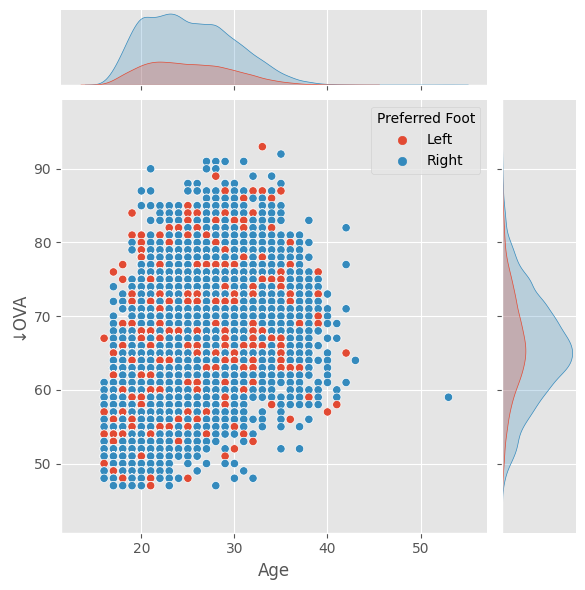

In [44]:
sns.jointplot(data=df, x="Age", y="↓OVA", hue="Preferred Foot")

There seems to be an outlier for a 53 year old player

In [45]:
df.loc[df['Age'] == 53, ['Full Name', 'Nationality', 'Club']]
#The oldest Fifa Player plays for a

Full Name Nationality         Club
16109  Kazuyoshi Miura       Japan  Yokohama FC

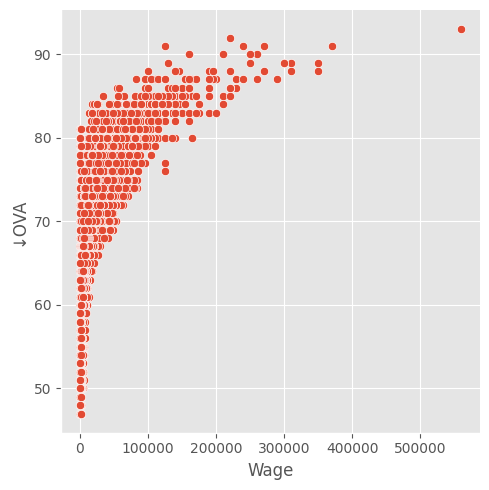

In [46]:
sns.relplot(data=df, x="Wage", y="↓OVA")
#It seems the best performing players are naturally paid the most with one player costing the most by far

In [47]:
#the top 10 most paid players
most_payed = df.nlargest(n=10, columns=['Wage'], keep='all')
most_payed[["Wage",'Full Name', 'Nationality', 'Club','↓OVA']]

Wage                          Full Name Nationality  \
0   560000                       Lionel Messi   Argentina   
3   370000                    Kevin De Bruyne     Belgium   
15  350000                      Karim Benzema      France   
26  350000                        Eden Hazard     Belgium   
12  310000  Carlos Henrique Venancio Casimiro      Brazil   
27  310000                         Toni Kroos     Germany   
16  300000                Sergio Ramos García       Spain   
17  300000                      Sergio Agüero   Argentina   
28  290000                  Antoine Griezmann      France   
4   270000         Neymar da Silva Santos Jr.      Brazil   
18  270000                    Raheem Sterling     England   

                   Club  ↓OVA  
0          FC Barcelona    93  
3       Manchester City    91  
15          Real Madrid    89  
26          Real Madrid    88  
12          Real Madrid    89  
27          Real Madrid    88  
16          Real Madrid    89  
17      Manchester City    89  
28         FC Barcelona    87  
4   Paris Saint-Germain    91  
18      Manchester City    88

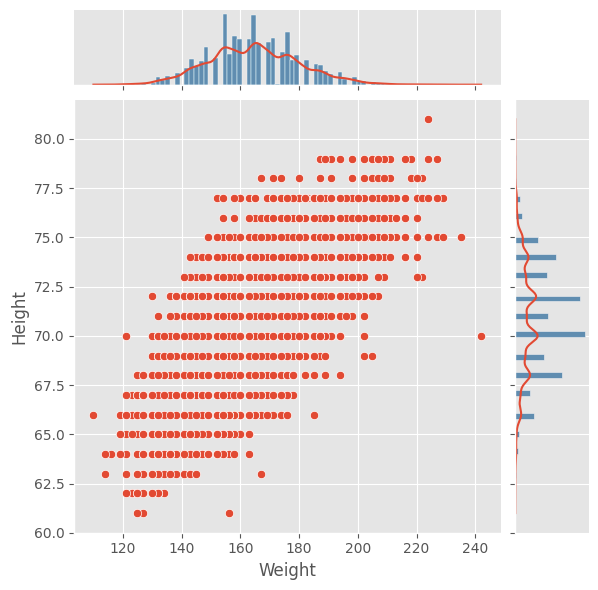

In [48]:
g = sns.JointGrid(data=df, x="Weight", y="Height")
g.plot_marginals(sns.histplot, kde=True)
g.plot(sns.scatterplot, sns.histplot)

In [49]:
heavyiest = df.nlargest(n=5, columns=['Weight'], keep='all')
heavyiest[["Weight",'Full Name', 'Nationality', 'Club','↓OVA']]
#the heaviest player is Adebayo Akinfenwa from England

Weight          Full Name    Nationality               Club  ↓OVA
10272     242  Adebayo Akinfenwa        England  Wycombe Wanderers    65
9478      235        Chris Seitz  United States          DC United    66
4527      229        Obbi Oularé        Belgium  Standard de Liège    71
4713      229    Fabien Farnolle          Benin     BB Erzurumspor    70
13615     229      Dennis Corozo        Ecuador          Delfín SC    62

In [50]:
Tallest = df.nlargest(n=5, columns=['Height'], keep='all')
Tallest[["Height",'Full Name', 'Nationality', 'Club','↓OVA']]
#the tallest player is Tomáš Holý from the Czech Republic

Height               Full Name     Nationality  \
10333      81              Tomáš Holý  Czech Republic   
1373       79          Fraser Forster         England   
1532       79           Lovre Kalinić         Croatia   
3607       79      Paul Ebere Onuachu         Nigeria   
3683       79            Henk Veerman     Netherlands   
4103       79       Costel Pantilimon         Romania   
4823       79            Karlo Letica         Croatia   
6441       79  Vanja Milinković-Savić          Serbia   
6996       79      Aleksandar Vukotić          Serbia   
8280       79          Kjell Scherpen     Netherlands   
8817       79          Simon Makienok         Denmark   
9552       79            Axel Sjöberg          Sweden   
9689       79             Tim Rönning          Sweden   
10860      79               Abdoul Ba      Mauritania   
11200      79       Stefan Maierhofer         Austria   
11252      79   Eirik Holmen Johansen          Norway   
14320      79            Ross Laidlaw        Scotland   
17837      79         Duncan Turnbull   United States   
18189      79             Demba Thiam         Senegal   
18716      79       Kai McKenzie-Lyle          Guyana   

                           Club  ↓OVA  
10333              Ipswich Town    65  
1373                Southampton    76  
1532                Aston Villa    75  
3607                   KRC Genk    72  
3683              SC Heerenveen    72  
4103                Denizlispor    71  
4823                  Sampdoria    70  
6441                     Torino    68  
6996           Waasland-Beveren    68  
8280                       Ajax    67  
8817               FC St. Pauli    66  
9552                  DC United    66  
9689                IF Elfsborg    65  
10860                AJ Auxerre    64  
11200  FC Admira Wacker Mödling    64  
11252           Kristiansund BK    64  
14320            Ross County FC    61  
17837                Portsmouth    55  
18189                      SPAL    53  
18716          Cambridge United    51

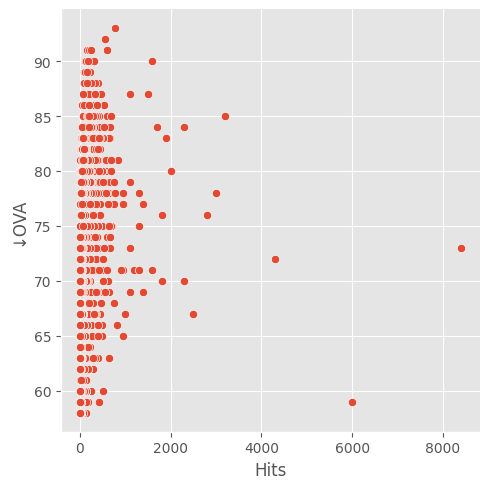

In [51]:
g = sns.relplot(x="Hits", y="↓OVA", data=df)

In [52]:
most_hits = df.nlargest(n=5, columns=['Hits'], keep='all')
most_hits[["Hits",'Full Name', 'Nationality', 'Club','↓OVA']]
#the tallest player is

Hits                      Full Name Nationality               Club  \
2579   8400.0                  Axel Tuanzebe     England  Manchester United   
15819  6000.0                 Daniel Maldini       Italy              Milan   
3791   4300.0           Pedro González López       Spain       FC Barcelona   
68     3200.0                Marcus Rashford     England  Manchester United   
690    3000.0  Francisco Mota Castro Trincão    Portugal       FC Barcelona   

       ↓OVA  
2579     73  
15819    59  
3791     72  
68       85  
690      78

In [53]:
df_clean.corr()

ID       Age      ↓OVA       POT    Height    Weight  \
ID                1.000000 -0.753413 -0.486968  0.023736 -0.111243 -0.209614   
Age              -0.753413  1.000000  0.466140 -0.269473  0.092868  0.241742   
↓OVA             -0.486968  0.466140  1.000000  0.632166  0.034429  0.147816   
POT               0.023736 -0.269473  0.632166  1.000000 -0.011058 -0.024590   
Height           -0.111243  0.092868  0.034429 -0.011058  1.000000  0.767037   
Weight           -0.209614  0.241742  0.147816 -0.024590  0.767037  1.000000   
BOV              -0.443686  0.401796  0.987149  0.669677  0.023467  0.128435   
Value            -0.131001  0.040994  0.552893  0.528200  0.004639  0.033996   
Wage             -0.256117  0.157751  0.589601  0.485241  0.023719  0.064334   
Release Clause   -0.161860  0.074079  0.599142  0.548897  0.004631  0.039488   
Attacking        -0.180955  0.146765  0.446337  0.284542 -0.359547 -0.275579   
Crossing         -0.156939  0.124639  0.406600  0.255631 -0.482869 -0.397341   
Finishing        -0.117892  0.081765  0.323638  0.216708 -0.368024 -0.285211   
Heading Accuracy -0.140575  0.146402  0.325182  0.179505  0.015869  0.044666   
Short Passing    -0.173973  0.142810  0.500041  0.351508 -0.347470 -0.273409   
Volleys          -0.189012  0.138232  0.372520  0.229958 -0.339295 -0.254615   
Skill            -0.184415  0.132555  0.458098  0.314697 -0.446557 -0.360076   
Dribbling        -0.079190  0.024563  0.376388  0.307785 -0.475338 -0.399724   
Curve            -0.196558  0.139144  0.417868  0.276144 -0.433317 -0.346989   
FK Accuracy      -0.222498  0.181559  0.382736  0.213187 -0.396359 -0.309079   
Long Passing     -0.220780  0.183336  0.484577  0.314743 -0.313603 -0.244967   
Ball Control     -0.136157  0.091793  0.447363  0.331928 -0.406008 -0.329595   
Movement         -0.038604 -0.022100  0.354798  0.311086 -0.612880 -0.521039   
Acceleration      0.093328 -0.142046  0.203445  0.241466 -0.538891 -0.482682   
Sprint Speed      0.091788 -0.135785  0.212523  0.242221 -0.456618 -0.407337   
Agility          -0.059803 -0.012064  0.276601  0.235622 -0.609370 -0.531118   
Reactions        -0.472715  0.454699  0.866954  0.509078  0.001708  0.106389   
Balance           0.019268 -0.076881  0.126790  0.155335 -0.758035 -0.652668   
Power            -0.310576  0.299444  0.572780  0.286291 -0.139577 -0.017864   
Shot Power       -0.318014  0.266381  0.557946  0.334879 -0.153604 -0.044025   
Jumping          -0.206838  0.204923  0.283194  0.111208  0.000829  0.067974   
Stamina          -0.101355  0.118090  0.379696  0.207132 -0.280157 -0.218932   
Strength         -0.297844  0.348577  0.356192  0.064985  0.529112  0.612752   
Long Shots       -0.194421  0.155406  0.405656  0.241704 -0.374436 -0.275533   
Mentality        -0.252161  0.226098  0.499758  0.288993 -0.311277 -0.223537   
Aggression       -0.240876  0.244119  0.397913  0.187498 -0.041135  0.026137   
Interceptions    -0.170786  0.180499  0.315541  0.158974 -0.055473 -0.037147   
Positioning      -0.127357  0.095557  0.352186  0.228352 -0.433197 -0.347279   
Vision           -0.254340  0.196022  0.507402  0.338202 -0.357156 -0.272043   
Penalties        -0.170147  0.136748  0.327826  0.197405 -0.315621 -0.232633   
Composure        -0.412840  0.357505  0.703051  0.423777 -0.153603 -0.059070   
Defending        -0.109787  0.118043  0.272015  0.162243 -0.072543 -0.061441   
Marking          -0.156884  0.162004  0.317043  0.173577 -0.068263 -0.047468   
Standing Tackle  -0.093070  0.101411  0.256152  0.158544 -0.069846 -0.062052   
Sliding Tackle   -0.075177  0.085888  0.229146  0.145731 -0.075222 -0.070714   
Goalkeeping      -0.115777  0.121684  0.006304 -0.039022  0.364039  0.343175   
GK Diving        -0.111569  0.117085  0.005138 -0.038078  0.360125  0.338078   
GK Handling      -0.113757  0.117987  0.004731 -0.038337  0.359796  0.339255   
GK Kicking       -0.112879  0.119175  0.001663 -0.042994  0.356764  0.335606   
GK Positioning   -0.1234

<Axes: >

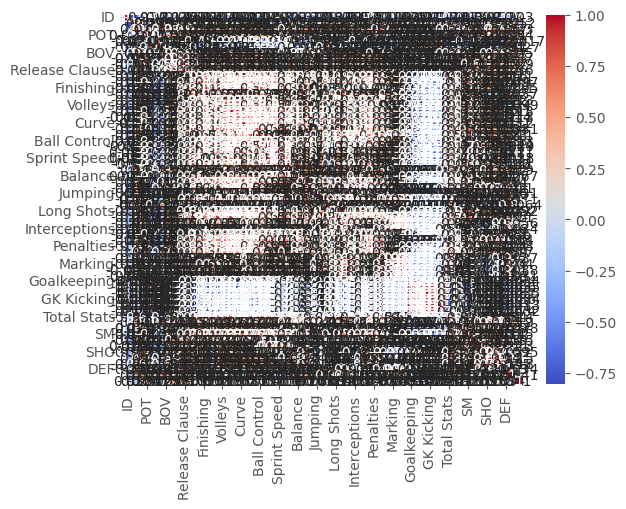

In [54]:
# Calculate the correlation between columns using the corr() function
corr_matrix = df_clean.corr()

# Display the correlation heatmap between columns
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')



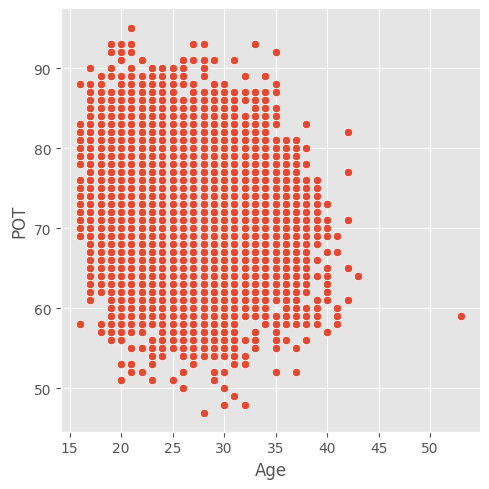

In [55]:
g = sns.relplot(x="Age", y="POT", data=df_clean)

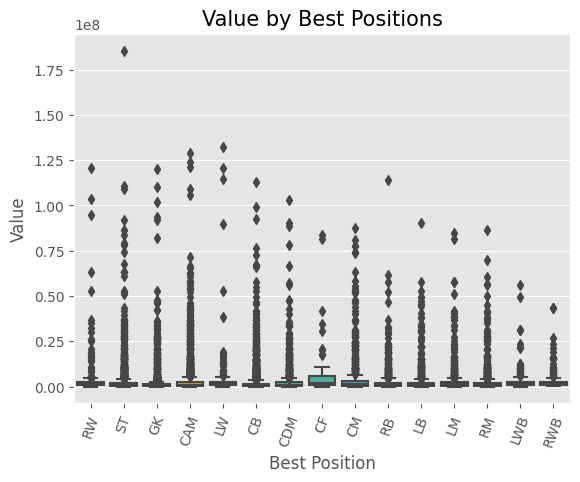

In [67]:
df_clean["Wage"]
sns.boxplot(x ="Best Position",y ="Value" ,data = df_clean)
plt.xticks(rotation=70)
plt.title("Value by Best Positions",fontsize=15)
plt.show()

**Insight:**

1. the best 3 position with an average high value for soccer players : ST(striker), LW(left wing), CAM(center attacking midfielder)

2. Bottom 3 position: LB, LWB, RB